In [71]:
from fastai.vision.all import *

In [72]:
path = Path.cwd()/'datasets/bears'

In [73]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = .2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [74]:
doc(bears.new)

In [75]:
dls = bears.dataloaders(path)

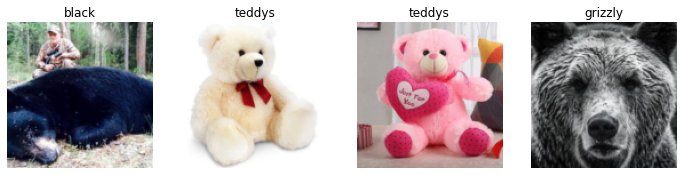

In [76]:
dls.valid.show_batch(max_n = 4, nrows = 1)

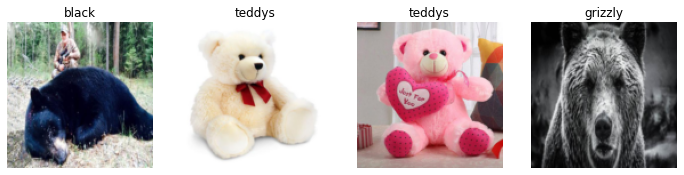

In [82]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

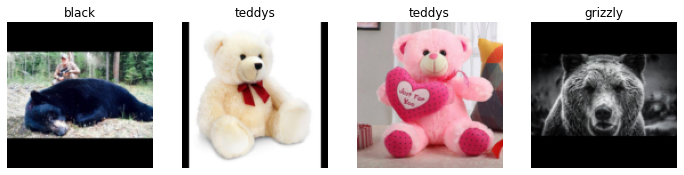

In [78]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

#### One time of data augmentation

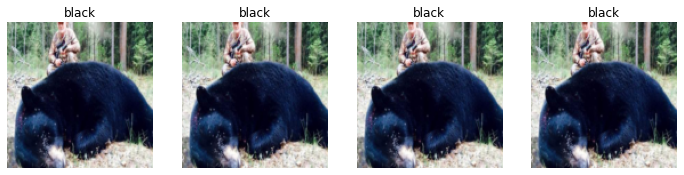

In [85]:
bears = bears.new(item_tfms = RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

### Data augmentation

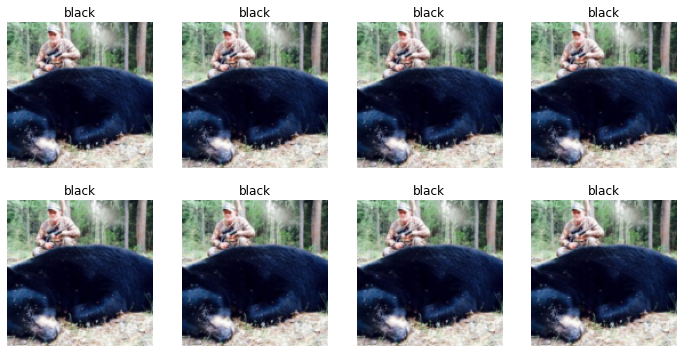

In [93]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2, min_zoom = 1.0))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [81]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.256695,0.408493,0.076923,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.338077,0.195129,0.057692,00:02
1,0.333231,0.204596,0.057692,00:02
2,0.288299,0.258223,0.057692,00:02
3,0.258100,0.218751,0.057692,00:02


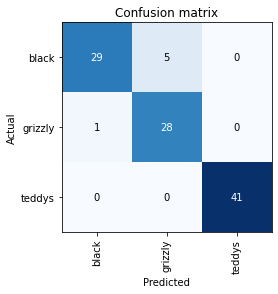

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

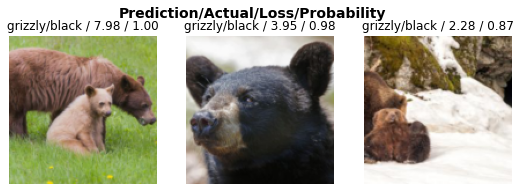

In [94]:
interp.plot_top_losses(3)

In [87]:
from fastai.vision.widgets import ImageClassifierCleaner

In [88]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [30]:
for idx, cat in cleaner.change(): shutill.move(str(cleaner.fns[idx]), path/cat)

#### Exporting model

In [97]:
path = Path.cwd()/'models'
# path.mkdir()

In [98]:
learn.export(path/'bear.pkl')

In [99]:
path.ls()

(#1) [Path('/home/fastai-2020-lalkrishna/My-files/models/bear.pkl')]

### Loading model

In [100]:
learn_inf = load_learner(path/'bear.pkl')

In [101]:
from fastai.vision import widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

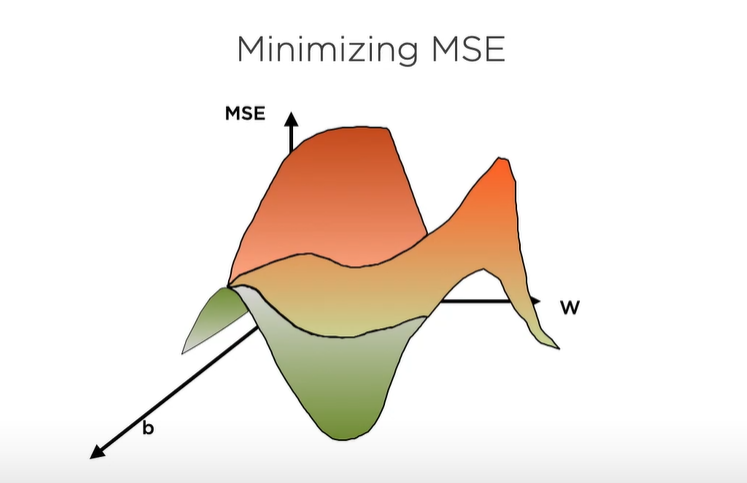

In [105]:
img = PILImage.create(btn_upload.data[0])
img

In [103]:
learn_inf.predict(img)

('teddys', tensor(2), tensor([0.0253, 0.0018, 0.9729]))

In [104]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddys']

### Widget

In [108]:
from fastai.vision import widgets

In [125]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [118]:
with out_pl: display(img.to_thumb(128, 128))

label to display

In [119]:
lbl_pred = widgets.Label()
lbl_pred.value = 'choose'
lbl_pred

Label(value='choose')

In [124]:
run = widgets.Button(description='Classify')
run

Button(description='Classify', style=ButtonStyle())

In [123]:
def on_click_classify(change):
    img = PILImage.create(run.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred,_, prob = learn_inf.predict(img)
    lbl_pred.value = f"prediction is {pred}"    
    
    
run.on_click(on_click_classify)